In [3]:
#This program has the simulation for 100 different problems for different problem and board size
#authors: Anusha Prakash, Janani Hemachandra, Madhura Anand 

# SIMULATING THE SNAKE AND LADDER AND EXPERIMENTATION

In [18]:

import time
import random
import sys
from IPython.display import HTML
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt


from NN_Model import NeuralNetwork


BOARD_SIZE = 100
DICE_FACE = 6


train_data_input = []
train_data_output = []
test_data_input = []
test_data_output = []

# snake takes you down from 'key' to 'value'
snakes = {
    8: 4,
    18: 1,
    26: 10,
    39: 5,
    51: 6,
    54: 36,
    56: 1,
    60: 23,
    75: 28,
    83: 45,
    85: 59,
    90: 48,
    92: 25,
    97: 87,
    99: 63
}

# ladder takes you up from 'key' to 'value'
ladders = {
    3: 20,
    6: 14,
    11: 28,
    15: 34,
    17: 74,
    22: 37,
    38: 59,
    49: 67,
    57: 76,
    61: 78,
    73: 86,
    81: 98,
    88: 91
}
def getShortestPathFromPos(pos):
    temp = pos
    jump = {**snakes, **ladders}
    for key in snakes.keys():
        if(key == pos) :
            pos = snakes[key]
    for key in ladders.keys():
        if(key == pos):
            pos = ladders[key]

    if(temp < pos) :
        return 1,dict()    
    steps = 0
    paths = dict()
    reached_top = False
    all_short_paths = list()
    reached_bottom = False
    top = 100
    
    
    while not reached_top:
        steps += 1
        if(steps == 1):
            paths[1] = [[pos,pos+1,pos+2,pos+3,pos+4,pos+5,pos+6]]
            for index,val in enumerate(paths[1][0]):
                if val in jump.keys():
                    paths[1][0][index] = jump[val]
            
        else:
            paths[steps] = list() 
            for lists in paths[steps - 1]:
               for val in  lists[1:]:
                   paths[steps].append([val,val+1,val+2,val+3,val+4,val+5,val+6])
            for index1,lists in enumerate(paths[steps]):
                for index2,val in enumerate(lists):
                    if val in jump.keys():
                        paths[steps][index1][index2] = jump[val]
                        val = jump[val]
                    if val == top:
                        reached_top = True
                        if(paths[steps][index1][0]):
                             all_short_paths.append([100,paths[steps][index1][0]])
        all_short_paths = [list(x) for x in set(tuple(x) for x in all_short_paths)]
        steps_down = 1
        while not reached_bottom:
            new_all_short_paths = list()
            if(steps - steps_down == 0): break
            for lists1 in all_short_paths:
                if(steps - steps_down > 0):
                    for lists2 in paths[steps - steps_down]:
                        if lists1[-1] in lists2:
                            new_all_short_paths.append(lists1 + [lists2[0]])
            all_short_paths = [list(x) for x in set(tuple(x) for x in new_all_short_paths)]
            steps_down += 1
            if steps - steps_down == 1:
                reached_bottom = True
    return steps,all_short_paths 


def calcDiceValue(Dice_Value,cur_pos):
    res = -1
    minimum_path = 1000
    step_list = []
    for i in range(Dice_Value + 1):
        pos = cur_pos + i
        if(pos > BOARD_SIZE) :  break
        if(pos == BOARD_SIZE) :
            return i , 1
        steps,paths = getShortestPathFromPos(pos)
        step_list.append(steps)
        print(paths)
        if(minimum_path > steps):
            minimum_path = steps
            res = i
            
    flag = 0
    for item in step_list:
            if(item != minimum_path) :
                flag = 1
                break
    if(flag == 1): return res,calcScore(cur_pos,res,1)
    else : return Dice_Value,calcScore(cur_pos,Dice_Value,1)
        

def setBoardSize(size):
    if (size < 100) :
        return
    BOARD_SIZE = size

def calcScore(cur_pos, dice_value,depth):
    if(depth == 0): return score;
    score = 50
    risk = 0
    reward = 0
    pos = cur_pos + dice_value
    for key in snakes.keys():
        if(int(key) == pos) :
            risk =  int(key) - int(snakes[key])
    for key in ladders.keys():
        if(key == pos):
            reward =  int(ladders[key]) - int(key)
    
    score = score - risk + reward
    #print(score)
    return score / 100.0


def createTrainDataset(train_data_count):

    
    for i in range(train_data_count):
        start_position = random.randint(0,BOARD_SIZE)
        dice_val = random.randint(1,6)
        depth = 1
        train_data_input.append([start_position,dice_val,depth])
        score = calcScore(start_position,dice_val,depth)
        train_data_output.append(score)



def createTestDataset(test_data_count):
    
    for i in range(test_data_count):
        start_position = random.randint(0,BOARD_SIZE)
        dice_val = random.randint(1,6)
        depth = 1
        test_data_input.append([start_position,dice_val,depth])
        score = calcScore(start_position,dice_val,depth)
        test_data_output.append(score)


def process(board_size, train_data_cnt, test_data_cnt,learning_rate,epochs):
    setBoardSize(board_size)
    print("*" * 30)
    print("Creating Train Dataset")
    createTrainDataset(train_data_cnt)
    print("Train Dataset Created")
    
    print("*" * 30)
    print("Creating Test Dataset")
    createTestDataset(test_data_cnt)
    print("Test Dataset Created")

    model = NeuralNetwork(learning_rate)
    training_error, test_error = model.train(train_data_input,train_data_output,test_data_input,test_data_output,epochs)
    
    plt.plot(training_error)
    plt.xlabel("Iterations")
    plt.ylabel("Error for all training instances")
    plt.savefig("train_error.png")
    plt.show()
    
    plt.plot(test_error)
    plt.xlabel("Iterations")
    plt.ylabel("Error for all test instances")
    plt.savefig("test_error.png")
    plt.show()
    
    return model



def predictScoreByNN(model,cur_pos,dice,depth): 
    return model.predict([cur_pos,dice,depth])



def predictDiceValue(model,pos,Dice_range):
    res = -1
    max_score = -10
    
    for i in range(Dice_range + 1):
        score = predictScoreByNN(model,pos,i,1)
        if(score > max_score).any() :
            res = i
            max_score = score
    if(res == 0) : res = Dice_range
    return res,max_score
 
def get_dice_value():
    dice_value = random.randint(1, DICE_FACE)
    return dice_value


def snake_ladder(player_name, current_value, dice_value):
    old_value = current_value
    current_value = current_value + dice_value

    if current_value > BOARD_SIZE:
        print("You need " + str(BOARD_SIZE - old_value) + " to win this game. Keep trying.")
        return old_value

    print("\n" + player_name + " moved from " + str(old_value) + " to " + str(current_value))
    if current_value in snakes:
        final_value = snakes.get(current_value)
    

    elif current_value in ladders:
        final_value = ladders.get(current_value)

    else:
        final_value = current_value

    return final_value


def check_win(player_name, position):
    if BOARD_SIZE == position:
        print("\n\n\nThats it.\n\n" + player_name + " won the game.")
        print("Congratulations " + player_name)
        print("\nThank you for playing the game.")
        return True


def simulate_game(game_size):
    #Requirement 8 and 9
    model = process(board_size=game_size,train_data_cnt=500,test_data_cnt=200,learning_rate=0.0001,epochs=500)


    #Requirement 10 and 5

    simulation_steps = 100

    player1_scorelist = []
    player2_scorelist = []

    for i in range(simulation_steps):
        player1_current_position = 0
        player2_current_position = 0
        player1_name = "player1(NN)"
        player2_name = "player2(tree-based)"

        player1_score = 0
        player2_score = 0


        while True:

            dice_value = get_dice_value()

            print(f"Player 1's dice range is {dice_value}")
            dice_input_1,score1 = predictDiceValue(model,player1_current_position,dice_value)

            print("Player1(NN)" + " moving....")
            player1_current_position = snake_ladder(player1_name, player1_current_position, dice_input_1)
            chkp1_win = check_win(player1_name, player1_current_position)

            dice_value = get_dice_value()
            print(f"Player 2's dice range is {dice_value}")
            print("Calculating the best choice to win for ",{player2_name})
            dice_2,score2 = calcDiceValue(dice_value,player2_current_position)

            print(player2_name + " moving....")
            player2_current_position = snake_ladder(player2_name, player2_current_position, dice_2)
            chkp2_win = check_win(player2_name, player2_current_position)

            player1_score += score1
            player2_score += score2

            if chkp1_win == True or chkp2_win == True :
                break


        player1_scorelist.append(player1_score)
        player2_scorelist.append(player2_score)


    player1_scorearr = np.array(player1_scorelist)
    player2_scorearr = np.array(player2_scorelist)


    x_array = np.arange(0, 100, 1, dtype=int)


    plt.plot(player1_scorearr)
    plt.title("Scores for Player1(NN) ")
    plt.xlabel("Simulation iterations")
    plt.ylabel("scores for simulations(NN)")
    plt.savefig("scores_simulation_NN"+str(game_size)+".png")
    plt.show()


    plt.plot(player2_scorearr)
    plt.title("Scores for Player2(Tree-based) ")
    plt.xlabel("Simulation iterations")
    plt.ylabel("scores for simulations(Tree-Based)")
    plt.savefig("scores_simulation_TreeBased"+str(game_size)+".png")
    plt.show()



    histogram1 = np.histogram(player1_scorearr, density=True)
    histogram2 = np.histogram(player2_scorearr, density=True)

    _ = plt.hist(histogram1, bins='auto') 
    plt.title("Histogram with Player1's score")
    plt.savefig("Histogram with Player1's score"+str(game_size)+".png")
    plt.show()

    _ = plt.hist(histogram2, bins='auto') 
    plt.title("Histogram with Player2's score")
    plt.savefig("Histogram with Player2's score"+str(game_size)+".png")
    plt.show()








### Simulating a game for board size 100

******************************
Creating Train Dataset
Train Dataset Created
******************************
Creating Test Dataset
Test Dataset Created


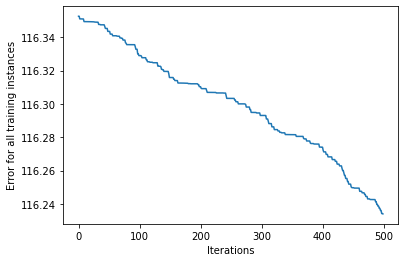

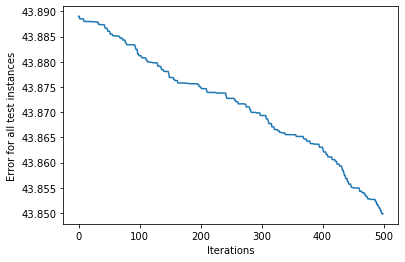

Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 0 to 6
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 0 to 1
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 14 to 18
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 1 to 2
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 1 to 2
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 2 to 3
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 2 to 4
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
{

[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 41 to 47
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
{}
[[100, 94, 91], [100, 95, 91], [100, 96, 91]]
player2(tree-based) moving....

player2(tree-based) moved from 78 to 81
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 47 to 53
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 98 to 100



Thats it.

player2(tree-based) won the game.
Congratulations player2(tree-based)

Thank you for playing the game.
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 0 to 6
Player 2's dice range is 1
Calculating the best choice to win f

[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 34 to 38
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
{}
[[100, 94, 91], [100, 95, 91], [100, 96, 91]]
player2(tree-based) moving....

player2(tree-based) moved from 78 to 81
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 59 to 65
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 98 to 100



Thats it.

player2(tree-based) won the game.
Congratulations player2(tree-based)

Thank you for playing the game.
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 0 to 6
Player 2'

Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 0 to 3
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 14 to 18
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 21
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 1 to 4
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 21 to 22
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 4 to 10
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
player2(tree-b

[[100, 98]]
{}
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 0 to 3
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 14 to 17
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 74 to 75
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 28 to 34
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving

[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 13 to 19
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 19 to 22
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 37 to 38
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
player2(tree-based) moving....

player2(tree-based) moved from 78 to 79
Player 

[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 27 to 30
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
{}
[[100, 94, 91], [100, 95, 91], [100, 96, 91]]
player2(tree-based) moving....

player2(tree-based) moved from 78 to 81
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 30 to 31
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 98 to 100



Thats it.

player2(tree-based) won the game.
Congratulations player2(tree-based)

Thank you for playing the game.
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 0 to 5
Player 2'

[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 28 to 30
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 30 to 34
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 34 to 40
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
{}
[[100, 94, 91],

[[100, 98]]
[[100, 98]]
{}
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 0 to 3
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 14 to 15
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 34 to 37
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 37 to 38
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [

[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 24 to 27
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 27 to 29
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
player2(tree-based) moving....

player2(tree-based) moved from 78 to 80
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 29 to 30
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 80]]
{}
[[100, 94, 91], [100, 95, 91], [100, 9

[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 4 to 6
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 14 to 17
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 74 to 75
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
{}
[[100, 94, 91], [100, 95, 91]

[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 0 to 2
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 4 to 6
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 2 to 3
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 14 to 19
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
{}
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 19 to 25
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 4
Player1(NN) moving....

play

[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 24 to 26
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 78 to 81
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 10 to 12
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 98 to 100



Thats it.

player2(tree-based) won the game.
Congratulations player2(tree-based)

Thank you for playing the game.
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 0 

[[100, 98]]
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 9 to 10
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 10 to 16
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 16 to 19
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 7

[[100, 98]]
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 0 to 3
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 5 to 6
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 21
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 14 to 17
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 21 to 22
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 74 to 78
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) mo

[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 0 to 2
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 1 to 4
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 2 to 3
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 4 to 7
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 7 to 9
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-ba

[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 10 to 12
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 12 to 13
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 59
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 13 to 16
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95]

[[100, 98]]
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 16 to 17
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 74 to 80
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 80 to 83
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]


[[100, 98]]
[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 1 to 3
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 74 to 76
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 76 to 77
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 77 to 78
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 59
Player 1's dice range is 3
Player1(NN) moving....

player1(

[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 28 to 34
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 34 to 36
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 36 to 42
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 

[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 9 to 15
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 34 to 40
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 40 to 44
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
player2(tree-based) moving....

pla

[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 5 to 6
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 14 to 15
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 34 to 40
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 8

[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 14 to 16
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 16 to 20
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
player2(tree-based) moving....

player2(tree-based) moved from 78 to 79
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 20 to 22
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 79]]
[[100, 98, 80]]
{}
[[100, 94, 91], [100, 95, 91], [100, 96, 91]]
[[100, 98], [100

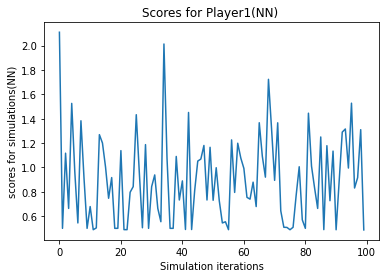

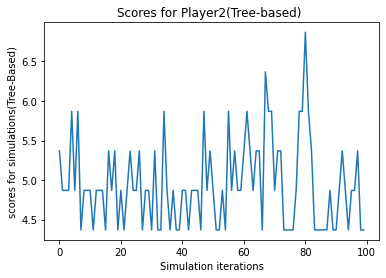

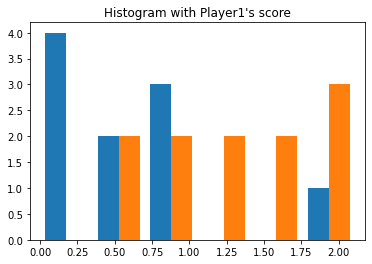

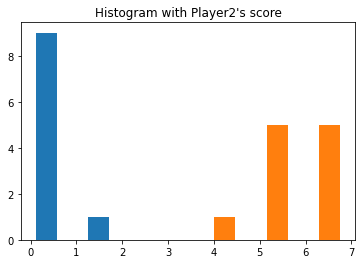

In [19]:

simulate_game(150)

### Simulating a game for board size 75


******************************
Creating Train Dataset
Train Dataset Created
******************************
Creating Test Dataset
Test Dataset Created


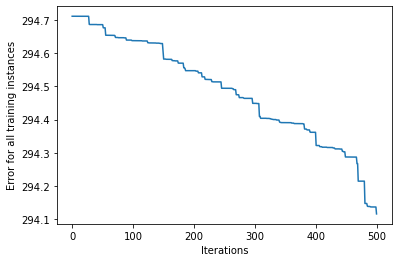

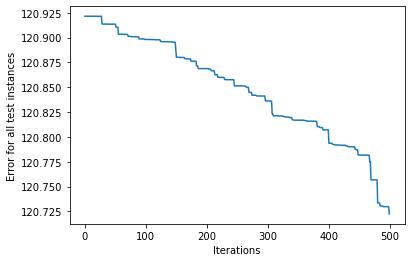

Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 0 to 6
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 0 to 3
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 14 to 16
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 16 to 17
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 74 to 75
Player 2's dice range is 4
Calculating the best choice to win for  {'player

[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 74 to 80
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
{}
[[100, 94, 91], [100, 95, 91], [100, 96, 91]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 95, 89], [100, 94, 91], [100, 95, 91], [100, 96, 91], [100, 94, 89]]
player2(tree-based) moving....

player2(tree-based) moved from 78 to 81
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 80 to 86
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 98 to 100



Thats it.

player2(tree

[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 10 to 11
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
{}
[[100, 94, 91], [100, 95, 91], [100, 96, 91]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 78 to 81
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 28 to 34
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 98 to 98
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 34 to 39
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 100, 98]]
[[100, 98], [100, 94], [10

[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 31 to 34
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
player2(tree-based) moving....

player2(tree-based) moved from 78 to 79
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 34 to 38
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 79]]
[[100, 98, 80]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 79 to 81
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 59 to 63
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving..

[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 9 to 12
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 12 to 15
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 59
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 34 to 37
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 5
Player1(N

[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 45 to 47
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
{}
[[100, 94, 91], [100, 95, 91], [100, 96, 91]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 95, 89], [100, 94, 91], [100, 95, 91], [100, 96, 91], [100, 94, 89]]
player2(tree-based) moving....

player2(tree-based) moved from 78 to 81
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 47 to 52
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 98 to 100



Thats it.

player2(tree-based) won the game.
Congratulations player2(tree-based)

Thank you for playing the

[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 10 to 16
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
player2(tree-based) moving....

player2(tree-based) moved from 78 to 80
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 16 to 19
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 80]]
{}
[[100, 94, 91], [100, 95, 91], [100, 96, 91]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 95, 89], [100, 94, 91], [100, 95, 91], [100, 96, 91], [100, 94, 89]]
[[100, 98, 78]]
[[100, 95, 89], [100, 94, 91], [100, 95, 91], [100, 96, 91], [100, 94, 89]]
player2(tree-based) moving....

player2(tree-based) moved from 80 to 81
Playe

[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 21 to 22
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 79 to 83
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 45 to 48
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 48 to 54
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
player2(tree-based) moving....

player2(tree-b

[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 14 to 20
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 20 to 26
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 10 to 16
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
{}
[[100, 94, 91], [100, 95, 91], [100, 96, 91]]
[[100, 98], [100,

[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 1 to 6
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 14 to 15
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 34 to 38
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(t

[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 21 to 22
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 34 to 35
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 35 to 37
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 37 to 41
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
{}
[[100, 94, 91], [100, 95, 91], [100, 96, 91]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 95, 89], [100, 94, 

[[100, 98]]
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 0 to 3
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 4 to 10
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 10 to 14
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 14 to 19
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving.

[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 29 to 30
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
{}
[[100, 94, 91], [100, 95, 91], [100, 96, 91]]
player2(tree-based) moving....

player2(tree-based) moved from 78 to 81
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 30 to 32
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 98 to 100



Thats it.

player2(tree-based) won the game.
Congratulations player2(tree-based)

Thank you for playing the game.
Player 1's dice range is 5
Player1(NN) moving....

pla

[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 98 to 98
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 5 to 8
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 98 to 100



Thats it.

player2(tree-based) won the game.
Congratulations player2(tree-based)

Thank you for playing the game.
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 0 to 6
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 0 to 2
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 14 to 15
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 

[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 0 to 2
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 5 to 6
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 2 to 3
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 14 to 16
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 16 to 17
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....


[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 21 to 22
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 25 to 30
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 30 to 33
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 33 to 39
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
{}
[[100, 94, 91], [100, 95

[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 21 to 22
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 16 to 19
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 19 to 25
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 25 to 27
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
{}
[[100, 94, 91], [100, 95, 91], [100,

[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 40 to 44
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 44 to 46
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 46 to 48
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
player2(tree-based) moving....

player2(tree-based) moved from 78 to 80
Player 1'

[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 21 to 22
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 74 to 80
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 80 to 84
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 84 to 89
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
player2(tree-based) mo

[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 45 to 51
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
{}
[[100, 94, 91], [100, 95, 91], [100, 96, 91]]
player2(tree-based) moving....

player2(tree-based) moved from 78 to 81
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 6 to 10
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 98 to 100



Thats it.

player2(tree-based) won the game.
Congratulations player2(tree-based)

Thank you for playing the game.
Player 1's dice range is 3
Play

[[100, 98]]
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 4 to 10
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 10 to 13
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 13 to 17
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[10

[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 95, 89], [100, 94, 91], [100, 95, 91], [100, 96, 91], [100, 94, 89]]
player2(tree-based) moving....

player2(tree-based) moved from 78 to 81
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 34 to 35
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 98 to 100



Thats it.

player2(tree-based) won the game.
Congratulations player2(tree-based)

Thank you for playing the game.
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 0 to 6
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
[[100, 98]]
{}
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 0 to 3
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 14 to 16
Playe

[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 21 to 22
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 77 to 78
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 78 to 81
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 4
Player1(NN) moving....
You need 2 to win this game. Keep trying.
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 78 to 81
Player 1's dice range is 4
Player1(NN) moving....
You need 2

[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 34 to 38
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
player2(tree-based) moving....

player2(tree-based) moved from 78 to 80
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 59 to 63
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 80]]
{}
[[100, 94, 91], [100, 95, 91], [100, 96, 91]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 95, 89], [100, 94, 91], [100, 95, 91], [100, 96, 91], [100, 94, 89]]
[[100, 98, 78]]
player2(tree-based) moving....

player2(tree-based) moved from 80 to 81
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved 

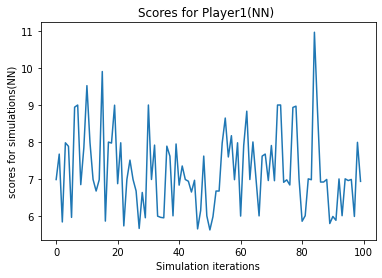

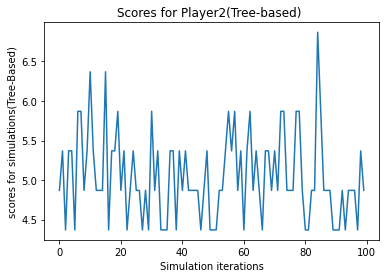

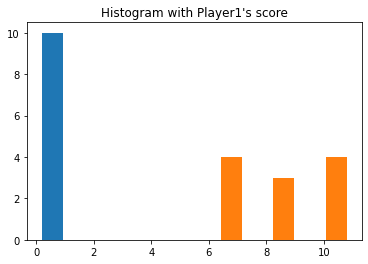

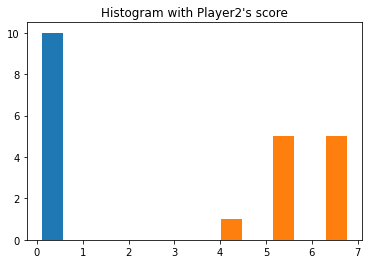

In [11]:

simulate_game(75)

### Simulating a game for board size 250

******************************
Creating Train Dataset
Train Dataset Created
******************************
Creating Test Dataset
Test Dataset Created


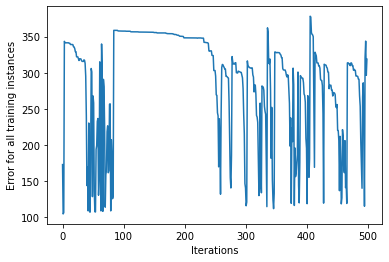

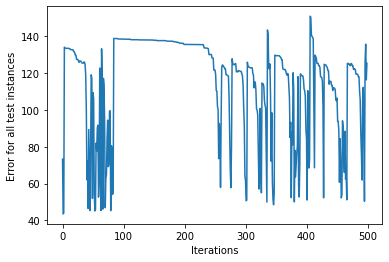

Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 0 to 5
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 0 to 3
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 5 to 8
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 4 to 9
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 9 to 11
Player 2's dice range is 5
Calculating the best choice to win for  {'pl

[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 5 to 8
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 78 to 81
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 4 to 5
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 98 to 100



Thats it.

player2(tree-based) won the game.
Congratulations player2(tree-based)

Thank you for playing the game.
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 0 to 3
Player 2's dice range is 4
Calculating the best choice to win for  {

[[100, 98]]
[[100, 98]]
[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 0 to 3
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 1 to 2
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 2 to 6
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 14 to 20
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
player2(tree-based) moving....

player2

Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
player2(tree-based) moving....

player2(tree-based) moved from 78 to 79
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 40 to 45
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 79]]
[[100, 98, 80]]
{}
[[100, 94, 91], [100, 95, 91], [100, 96, 91]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 79 to 81
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 45 to 51
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 98 to 100



Thats it.

player2(tree-based) won the game.
Congratulations player2(tree-based)

Thank you for playing the game.
Player 1's dice range is 4
Player1

[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 7 to 13
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
player2(tree-based) moving....

player2(tree-based) moved from 78 to 79
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 13 to 14
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 79]]
[[100, 98, 80]]
{}
[[100, 94, 91], [100, 95, 91], [100, 96, 91]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 95, 89], [100, 94, 91], [100, 95, 91], [100, 96, 91], [100, 94, 89]]
player2(tree-based) moving....

player2(tree-based) moved from 79 to 81
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 14 to 15
Player 2's dice range is 6
Calculating the best cho

[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 77 to 78
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
{}
[[100, 94, 91], [100, 95, 91], [100, 96, 91]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 78 to 81
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 78 to 80
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 98 to 100



Thats it.

player2(tree-based) won the game.
Congratulations player2(tree-based)

Thank you for playing the game.
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved 

[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 10 to 14
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 14 to 19
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 19 to 24
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]

[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 16 to 21
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 21 to 25
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 25 to 29
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
player2(tree-based) moving....

player2(tre

[[100, 98]]
[[100, 98]]
[[100, 98]]
{}
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 0 to 3
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 20 to 25
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 25 to 28
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 28 to 31
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [

Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 21 to 25
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 98 to 98
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 25 to 27
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 98 to 100



Thats it.

player2(tree-based) won the game.
Congratulations player2(tree-based)

Thank you for playing the game.
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 0 to 5
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
[[100, 98]]
{}
[[100, 98]]
player2(tree-based) moving....

player2(tre

[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 5 to 9
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 9 to 12
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 12 to 17
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
player2(tree-based) moving....

player2(tree-based) moved from 78 to 80
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) 

[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 19 to 25
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 25 to 30
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 30 to 31
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
{}
[[1

Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 7 to 9
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 9 to 15
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 59
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 34 to 36
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 36 to 42
Player 2's dice range is 3
Calculating the best choice to win f

[[100, 98]]
[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 0 to 3
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 14 to 16
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 16 to 20
Player 2's dice range is 4
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 20 to 24
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved f

[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 14 to 18
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 78 to 81
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 1 to 6
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 98 to 100



Thats it.

player2(tree-based) won the game.
Congratulations player2(tree-based)

Thank you for playing the game.
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 0 to

[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 20 to 26
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 10 to 13
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 13 to 15
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
{}
player2(tree-based) moving....

player2(tree-bas

[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 0 to 1
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 14 to 19
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
{}
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 1 to 3
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 19 to 22
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
{}
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 37 to 42
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to

[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 98 to 98
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 10 to 12
Player 2's dice range is 5
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 98 to 100



Thats it.

player2(tree-based) won the game.
Congratulations player2(tree-based)

Thank you for playing the game.
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 0 to 6
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 0 to 1
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 14 to 19
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
[[100

[[100, 98]]
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 21 to 23
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 1
Player1(NN) moving....

player1(NN) moved from 23 to 24
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 24 to 26
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
player2(tree-based) moving....

player2(tree-based) mov

[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 7 to 12
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 12 to 16
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
player2(tree-based) moving....

player2(tree-based) moved from 78 to 79
Player 1's dice range is 3
Player1(NN) moving....

player1(NN) moved from 16 to 19
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 79]]
[[100, 98, 80]]
{}
player2(tree-based) moving.

[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 40 to 45
Player 2's dice range is 6
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
[[100, 98, 80]]
{}
[[100, 94, 91], [100, 95, 91], [100, 96, 91]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
[[100, 95, 89], [100, 94, 91], [100, 95, 91], [100, 96, 91], [100, 94, 89]]
player2(tree-based) moving....

player2(tree-based) moved from 78 to 81
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 45 to 49
Player 2's dice range is 2
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 100, 98]]
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 98 to 100



Thats it.

player2(tree-based) won the game.
Congratulations player2(tree-based)

Thank you for playing the game.
Player 1's dice range i

[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 21 to 22
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 14 to 19
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
[[100, 98]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 19 to 24
Player 2's dice range is 3
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
{}
[[100, 98], [100, 94], [100, 95], [100, 96]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 61
Player 1's dice range is 4
Player1(NN) moving....

player1(NN) moved from 24 to 28
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98, 79]]
player2(tree-based) moving....

player2(tree-based) moved from 78 to 79
Player 1's dice ran

[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 20 to 22
Player 1's dice range is 2
Player1(NN) moving....

player1(NN) moved from 4 to 6
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98]]
{}
player2(tree-based) moving....

player2(tree-based) moved from 37 to 38
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 14 to 19
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 59
Player 1's dice range is 6
Player1(NN) moving....

player1(NN) moved from 19 to 25
Player 2's dice range is 1
Calculating the best choice to win for  {'player2(tree-based)'}
[[100, 98, 78]]
[[100, 98]]
player2(tree-based) moving....

player2(tree-based) moved from 59 to 59
Player 1's dice range is 5
Player1(NN) moving....

player1(NN) moved from 25 to 30
Player 2's dice range is 1

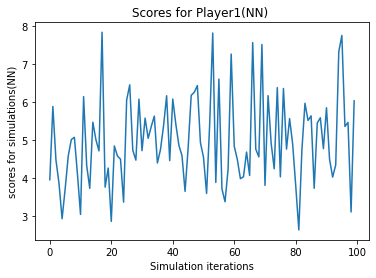

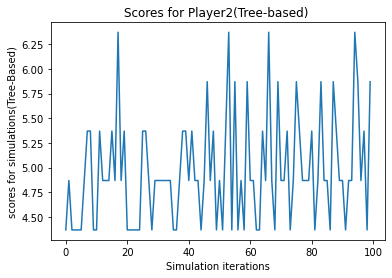

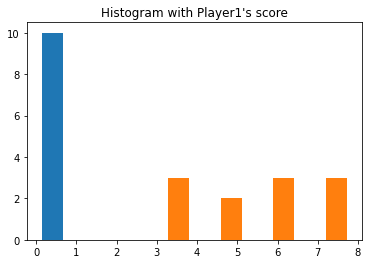

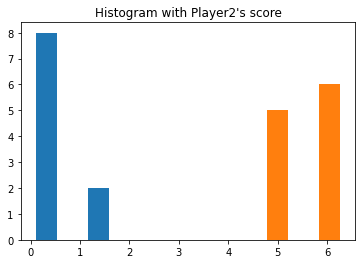

In [12]:

simulate_game(250)